<a href="https://colab.research.google.com/github/alex06733/Elektro/blob/main/Koeffizienten_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

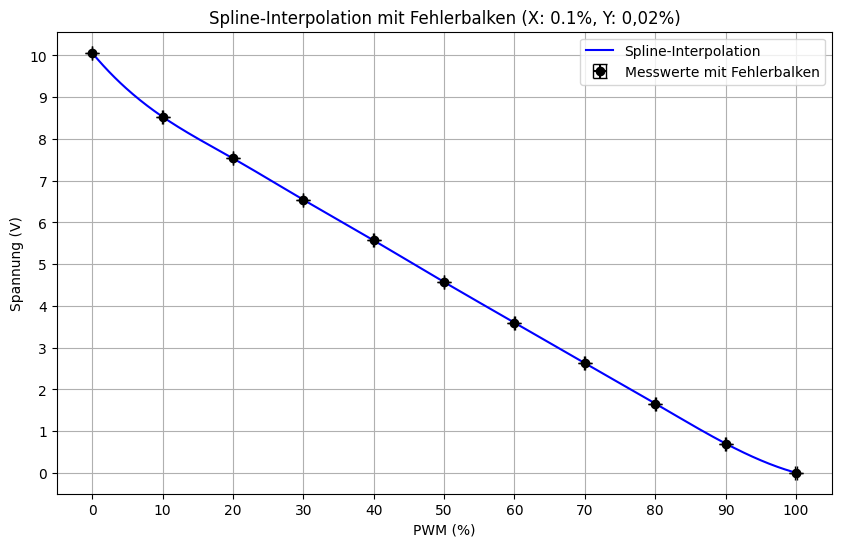

        a         b         c         d  x_start  x_end
0  10.062 -0.202551  0.006080 -0.000114      0.0   10.0
1   8.531 -0.115000  0.002675 -0.000114     10.0   20.0
2   7.535 -0.095551 -0.000730  0.000038     20.0   30.0
3   6.544 -0.098897  0.000396 -0.000025     30.0   40.0
4   5.570 -0.098361 -0.000342  0.000021     40.0   50.0
5   4.573 -0.098959  0.000282 -0.000013     50.0   60.0
6   3.599 -0.097103 -0.000097  0.000009     60.0   70.0
7   2.627 -0.096429  0.000164 -0.000016     70.0   80.0
8   1.663 -0.097982 -0.000319  0.000054     80.0   90.0
9   0.705 -0.088244  0.001293  0.000054     90.0  100.0


In [10]:
# Importieren der benötigten Module
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd

# Daten: PWM und Spannung
pwm = np.array([0.0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # PWM in %
voltage = np.array([10.062, 8.531, 7.535, 6.544, 5.57, 4.573, 3.599, 2.627, 1.663, 0.705, 0.0056])  # Spannung in V

# Fehlerbalken: 0,02% der Spannung und 0.1% der PWM
voltage_error = 0.0002 * voltage  # 0,02% Fehler der Spannung
pwm_error = 0.001 * pwm         # 0.1% Fehler der PWM

# Spline-Interpolation
spline = CubicSpline(pwm, voltage)
pwm_fine = np.linspace(pwm.min(), pwm.max(), 500)
voltage_spline_fit = spline(pwm_fine)

# Plot
plt.figure(figsize=(10, 6))

# Anpassung der Achseneinteilung
plt.xticks(np.arange(0, 110, 10))  # X-Achse in 10er Schritten
plt.yticks(np.arange(0, 12, 1))    # Y-Achse in 1er Schritten

# Originalmesswerte mit Fehlerbalken
plt.errorbar(pwm, voltage, xerr=pwm_error, yerr=voltage_error, fmt='o',
             label="Messwerte mit Fehlerbalken", color="black", capsize=5)

# Spline-Interpolation
plt.plot(pwm_fine, voltage_spline_fit, label="Spline-Interpolation", color="blue")

# Achsenbeschriftungen und Titel
plt.xlabel("PWM (%)")
plt.ylabel("Spannung (V)")
plt.title("Spline-Interpolation mit Fehlerbalken (X: 0.1%, Y: 0,02%)")
plt.legend()
plt.grid()

# Graph anzeigen
plt.show()

# Koeffizienten extrahieren
coefficients = pd.DataFrame(
    {
        "a": spline.c[3],  # Konstant
        "b": spline.c[2],  # Linear
        "c": spline.c[1],  # Quadratisch
        "d": spline.c[0],  # Kubisch
        "x_start": pwm[:-1],
        "x_end": pwm[1:],
    }
)

print(coefficients)
